In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.DataFrame(np.random.randint(0, 11, size=(1000000, 5)), columns=('a','b','c','d','e'))
df

,a,b,c,d,e
0,3,6,9,5,9
1,8,7,2,2,7
2,1,1,2,7,7
3,4,10,9,7,4
4,3,7,3,1,9
...,...,...,...,...,...
999995,1,1,4,8,2
999996,6,3,4,2,1
999997,1,5,9,1,10
999998,0,2,1,1,2


In [6]:
def func(a,b,c,d,e):
    if e == 10:
        return c*d
#     elif (e < 10) and (e>=5):
#         return c+d
#     elif e < 5:
#         return a+b

In [7]:
df['new'] = df.apply(lambda x: func(x['a'], x['b'], x['c'], x['d'], x['e']), axis=1)

In [8]:
df

,a,b,c,d,e,new
0,3,6,9,5,9,NaN
1,8,7,2,2,7,NaN
2,1,1,2,7,7,NaN
3,4,10,9,7,4,NaN
4,3,7,3,1,9,NaN
...,...,...,...,...,...,...
999995,1,1,4,8,2,NaN
999996,6,3,4,2,1,NaN
999997,1,5,9,1,10,9.0
999998,0,2,1,1,2,NaN


In [11]:
# Parallelize Pandas Apply with Swifter
# !pip install swifter --user


In [12]:
import swifter
df['new'] = df.swifter.apply(lambda x : func(x['a'],x['b'],x['c'],x['d'],x['e']),axis=1)

Pandas Apply:   0%|          | 0/1000000 [00:00<?, ?it/s]

## Pandas Vectorization

The fastest way to work with Pandas and Numpy is to vectorize your functions
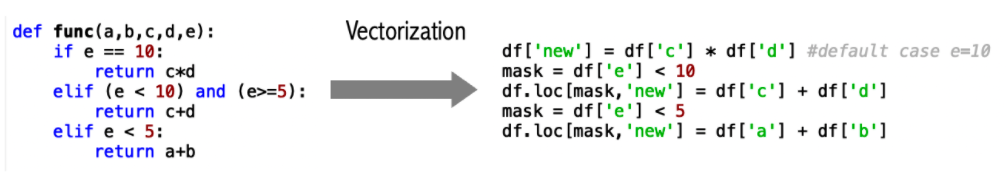

In [13]:
df['new'] = df['c'] * df['d'] #default case e = =10
mask = df['e'] < 10
df.loc[mask,'new'] = df['c'] + df['d']
mask = df['e'] < 5
df.loc[mask,'new'] = df['a'] + df['b']

###  Lighter Pandas DataFrames
You can speed up the execution even faster by using another trick: making your pandas' dataframes lighter by using more efficent data types.
As we know that df only contains integers from 1 to 10, we can then reduce the data type from 64 bits to 16 bits.

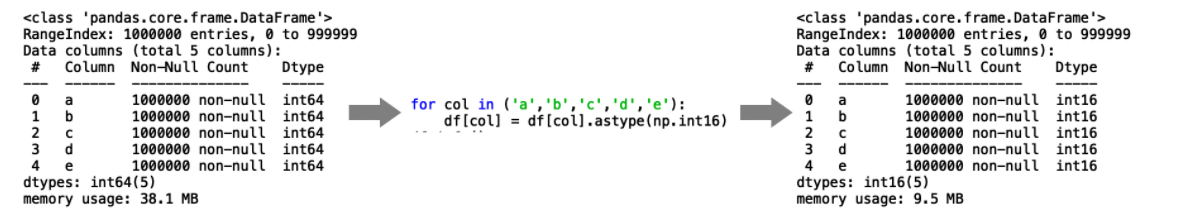

In [14]:
for col in ('a','b','c','d'):
    df[col] = df[col].astype(np.int16)

### NumPy Vectorization
The code above is relying on pandas Series to perform checks and computation. Pandas’ Series are composed of NumPy Array (to store data) plus some overhead info (such as the Series index and name).

In [ ]:
df = pd.DataFrame(np.random.randint(0, 11, size=(100000000, 5), dtype=np.int16), columns=('a','b','c','d','e'))

In [ ]:
df['new'] = df[['a','b','c','d']].sum(axis=1) * df['e']

In [ ]:
df[‘new’] = df[[‘a’,’b’,’c’,’d’]].values.sum(axis=1) * df[‘e’].values

NumPy Arrays can speed up the execution time further on massive datasets

## Conclusion
We showed that by using pandas vectorization together with efficient data types, we could reduce the running time of the apply function by 600 (without using anything else than pandas).
* Apply: 11.8 seconds
* Apply + Swifter: 6.71 seconds
* Pandas vectorizatoin: 0.035 seconds
* Pandas vectorization + data types: 0.019 seconds

# API

### API - App programming interface
An application programming interface (API) is a connection between computers or between computer programs. It is a type of software interface, offering a service to other pieces of software

### FLASK - Web App Development Framework

In [1]:
#  download Pycharm:  https://www.jetbrains.com/pycharm/download/download-thanks.html?platform=windows&code=PCC

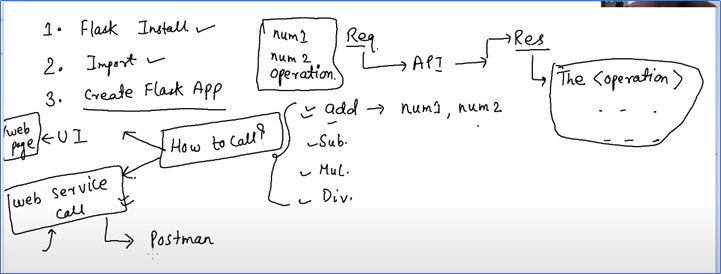

# flask
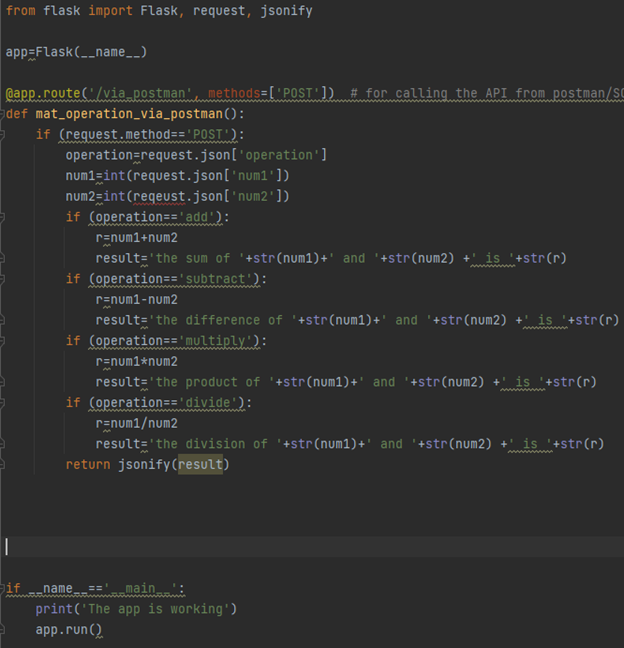

### for more info on flash see DataCamp_INeuron_01.docx

# MONGODB

In [10]:
import pymongo

In [11]:
# package which enables us to connect to the MONGO DB
dbConn=pymongo.MongoClient('mongodb://localhost:27017/')   #connecting to the locally running mongodab instance
# in other words we connect to the server

In [12]:
dbConn

MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)

In [16]:
dbname='demoDB'
db=dbConn[dbname]   
# connecting to the database named demoDB present in the mongoDB
# if the databse is not present, it will automatically create it

In [17]:
db

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'demoDB')

In [18]:
# show all the databases, if you just created a new empty database it wont be shown here
print(dbConn.list_database_names())

TypeError: 'Database' object is not callable. If you meant to call the 'list_database_names' method on a 'MongoClient' object it is failing because no such method exists.

In [19]:
# check if the database ecists in mongoDB
dblist=dbConn.list_database_names()  # obtaining all the databse names
print(dblist)
db_name='demoDB'

if db_name in dblist:
    print('this database exists')
else:
    print('this databse doesnt exist')

TypeError: 'Database' object is not callable. If you meant to call the 'list_database_names' method on a 'MongoClient' object it is failing because no such method exists.

In [ ]:
# connecting to a collection -- collections are analogous to tables in sql
collection_name='mongo_demo'
collection=db[collection_name]  # connecting to the collection itself present inthe database.

In [ ]:
# cheking if a collection exists
if collection_name in db.list_collection_names():
    print('this collection exists')
else:
    print('this collection doesnt exist')

In [ ]:
# inserting one row into the collection
my_row={'serial No':'9998',
       'GRE Score':'337',
       'TOEFL Score':'118',
       'University Rating':'4',
       'SOP':'4.5',
        'LOR':'4.5',
       'CGPA':'9.65',
       'Research':'1',
       'Chance of Admit':'0.92'}  # creating key value pairs for inserting into the DB

In [ ]:
x=collecion.insert_one(my_row)  # inserting record into the collection

In [ ]:
print(x.inserted_id)  # printing the unique id for insert

In [ ]:
# inserting multiple rows into the collection
my_rows=[{'serial No':'9998',
       'GRE Score':'337',
       'TOEFL Score':'118',
       'University Rating':'4',
       'SOP':'4.5',
        'LOR':'4.5',
       'CGPA':'9.65',
       'Research':'1',
       'Chance of Admit':'0.92'},  # creating key value pairs for inserting into the DB
        {'serial No':'9996',
       'GRE Score':'336',
       'TOEFL Score':'118',
       'University Rating':'4',
       'SOP':'4.5',
        'LOR':'4.5',
       'CGPA':'9.6',
       'Research':'0',
       'Chance of Admit':'0.92'}]

In [ ]:
# inserting records into the collection
x=collection.insert_many(my_rows)

In [ ]:
# printin the unique id for insert
print(x.inserted_ids)

In [ ]:
# reriewving all the records from collection
result=collection.find({})
result[3]  # printin the 3rd record

whenever we are calling the find() method, if we have too many rows/records in the table, then well get too many responses for that which might overwhel the application. to overcome this scenario we have a wa in mongo DB to hav an upper limit on the number of rows returnd

it is called the limit() method

In [ ]:
# printing only the five rows
result_total=collection.find({}).limit(5)
for res in result_total:
    print(res)

In [ ]:
# retrieving some columns
result_some=collection.find({},{"GRE Score", "TOEFL Score"})  # retrieve 2 columns
# the second paramter in find() specifies which columns to choose
for res in result_some:
    print(res)

In [ ]:
# finding the rows satisfying a given criteria
my_db_query={'GRE Score':'337'}  # printing all the rows where GRE Scores is 337
result_GRE=collection.find(my_db_query)
for res in result_GRE:
    print(res)

In [ ]:
# finding the rows satisfying a given criteria
my_db_query={'GRE Score':{'&gt':'337'}}  # printing all the rows where GRE Scores grater than 337
result_GRE=collection.find(my_db_query)
for res in result_GRE:
    print(res)

In [ ]:
# sorting
result_GRE=collection.find(my_db_query).sort("GRE Score")  # ascending order
for res in result_GRE:
    print(res)
    
# sorting
result_GRE=collection.find(my_db_query).sort("GRE Score", -1)  # descending order
for res in result_GRE:
    print(res)

In [ ]:
# deleting records
# finding rows satisfyong a given critera
my_db_query={"GRE Score":"337"}
x.collection.delete_one(my_db_query) # deletion step
print(x.deleted_count)

we have deleted one row/record from the collection
similarly, for deleting multiple rows we can use collection.delete_may(my_db_query)
for deleting all documents of a collection, we use collection.delete_many ({}) but the collection still exists just empty

In [ ]:
# dropping an entire collection
collection_to_drop=db['test_collection']  # drops the entire collection named test collection
collection_to_drop.drop()

In [ ]:
# updating values present in a colleciton
update_criteria={'GRE Score':'340'}
new_values={"$set":{"GRE Score":"350"}}

x=collection.update_many(update_criteria, new_values)  #thereis also update_one
print(x.modified_count)

In [ ]:
similarly we can update only one row by using the funcion update_one(update_criteria, new_values)